In [1]:
import os
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
m_df = pd.read_csv('Omsk_weather_last_year.csv', index_col='Datetime')
m_df.index = pd.to_datetime(m_df.index)

In [3]:
# Basic clean
def clean(m_df):
    # drop dublicates
    m_df = m_df.loc[~m_df.index.duplicated(keep='first')]
    
    # replace '-----' to nan
    m_df['T(C)'].replace('-----', np.nan, inplace=True)
    m_df['Td(C)'].replace('-----', np.nan, inplace=True)
    m_df['Tmax(C)'].replace('-----', np.nan, inplace=True)
    m_df['Tmin(C)'].replace('-----', np.nan, inplace=True)
    
    m_df['T(C)'] = m_df['T(C)'].astype(float)
    m_df['Td(C)'] = m_df['Td(C)'].astype(float)
    m_df['Tmax(C)'] = m_df['Tmax(C)'].astype(float)
    m_df['Tmin(C)'] = m_df['Tmin(C)'].astype(float)
    
    # Clear incorrect
    m_df['T(C)'].replace(-90.4, np.nan, inplace=True)
    
    # replace NaN to mean of 2 nb
    m_df['T(C)'] = m_df['T(C)'].where(m_df['T(C)'].values == 999, other=(m_df['T(C)'].fillna(method='ffill') + m_df['T(C)'].fillna(method='bfill'))/2)
    
    m_df = m_df.shift(periods=2)
    m_df = m_df.iloc[2:]
    
    return m_df

m_df = clean(m_df)
# m_df.to_csv('Omsk_weather_last_year_cl.csv')

c:\users\dima\appdata\local\programs\python\python36\lib\site-packages\pandas\core\series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
C:\Users\Dima\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\Dima\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [4]:
m_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4130 entries, 2019-12-01 15:00:00 to 2021-05-01 06:00:00
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   T(C)      4130 non-null   float64
 1   Td(C)     4129 non-null   float64
 2   Tmax(C)   517 non-null    float64
 3   Tmin(C)   579 non-null    float64
 4   ddd       4128 non-null   object 
 5   ffkmh     4130 non-null   float64
 6   Gustkmh   4130 non-null   object 
 7   P0hPa     4130 non-null   object 
 8   P seahPa  4130 non-null   object 
 9   PTnd      4130 non-null   object 
 10  Prec(mm)  4130 non-null   object 
 11  Nt        4130 non-null   object 
 12  Nh        4130 non-null   object 
 13  HKm       3635 non-null   object 
 14  InsoD-1   4130 non-null   object 
 15  Viskm     4130 non-null   object 
 16  Snow(cm)  2906 non-null   object 
 17  WW        4129 non-null   object 
 18  W1        4004 non-null   object 
 19  W2        3848 non-null   object 

In [5]:
m_df['2020-04-27'][['T(C)', 'ddd', 'ffkmh', 'P0hPa', 'Nt', 'Nh', 'HKm']]
# m_df['2020-12'][m_df['T(C)'] < -10]

,T(C),ddd,ffkmh,P0hPa,Nt,Nh,HKm
Datetime,,,,,,,
2020-04-27 00:00:00,10.3,S,3.6,1006.0,0,-,---
2020-04-27 03:00:00,7.3,CAL,0.0,1005.7,0,-,---
2020-04-27 06:00:00,1.5,NE,3.6,1005.2,0,-,---
2020-04-27 09:00:00,17.4,ESE,18.0,1002.7,8,5,---
2020-04-27 12:00:00,17.4,ESE,18.0,1002.7,8,5,---
2020-04-27 15:00:00,18.9,ESE,21.6,999.0,8,2,---
2020-04-27 18:00:00,18.6,ESE,14.4,996.4,8,8,---
2020-04-27 21:00:00,17.0,ESE,10.8,994.7,8,8,---


<AxesSubplot:ylabel='ddd'>

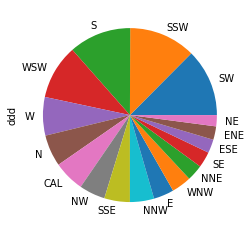

In [6]:
m_df['ddd'].value_counts().plot(kind='pie')

<AxesSubplot:ylabel='ddd'>

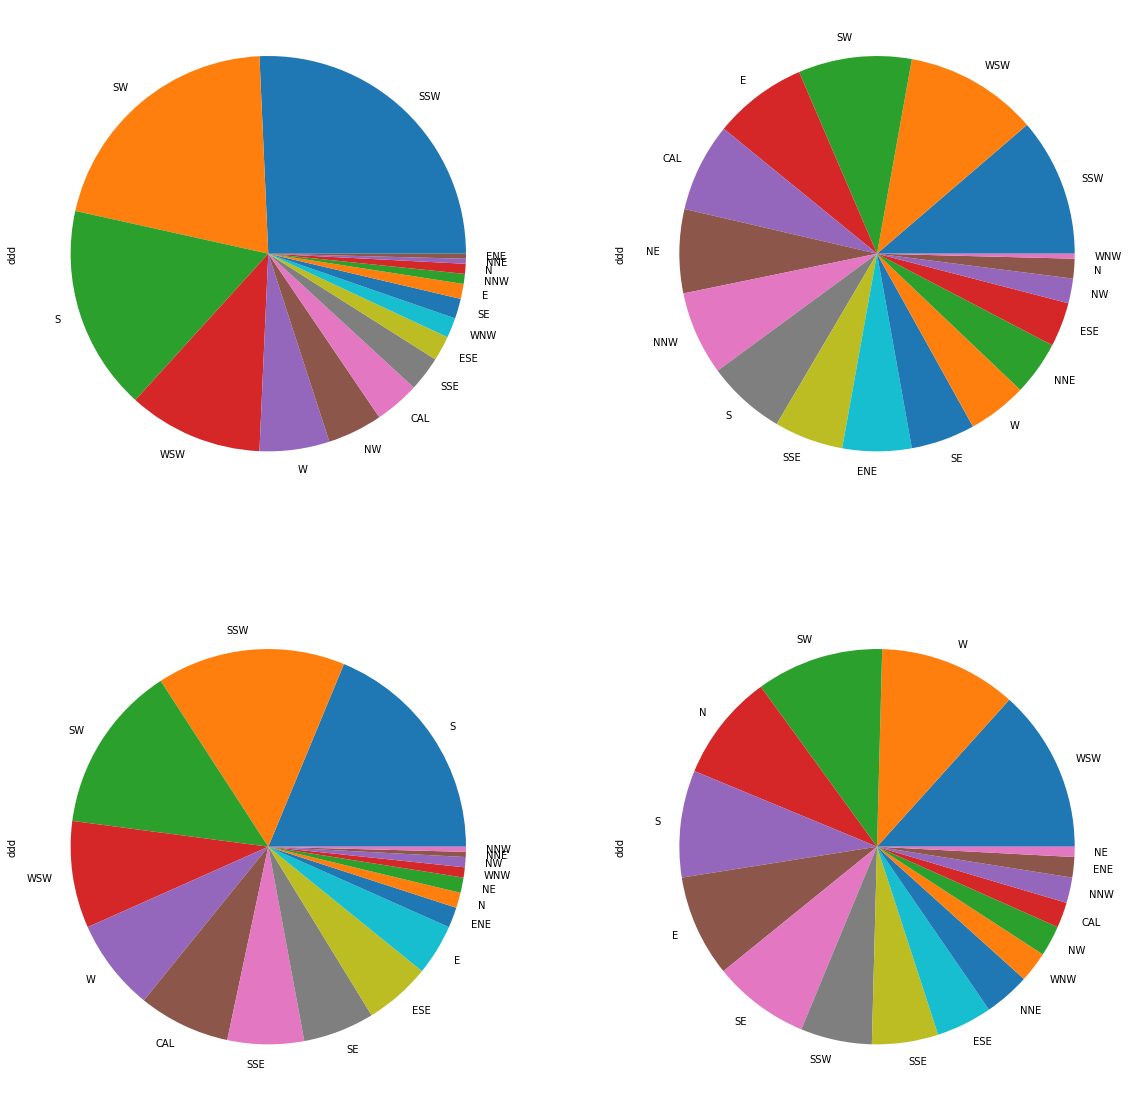

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))

m_df['2020-01']['ddd'].value_counts().plot(kind='pie', ax=axes[0,0])
m_df['2021-01']['ddd'].value_counts().plot(kind='pie', ax=axes[0,1])
m_df['2020-04']['ddd'].value_counts().plot(kind='pie', ax=axes[1,0])
m_df['2021-04']['ddd'].value_counts().plot(kind='pie', ax=axes[1,1])

<AxesSubplot:>

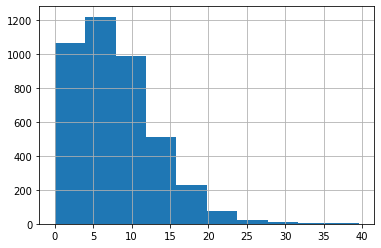

In [8]:
m_df['ffkmh'][m_df['ffkmh'] <= 50].hist(bins=10)

<AxesSubplot:xlabel='Datetime'>

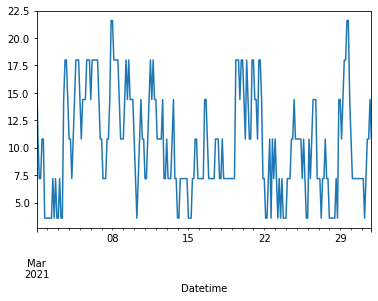

In [20]:
m_df['2021-03']['ffkmh'][m_df['ffkmh'] <= 50].astype(float).plot()

In [14]:
m_df4_ = m_df['ddd'].replace(['W','SW','WSW','WNW'],'West')
m_df4_ = m_df4_.replace(['N','NW','NNW','NNE'],'North')
m_df4_ = m_df4_.replace(['E','NE','ESE','ENE'],'East')
m_df4_ = m_df4_.replace(['S','SE','SSW','SSE'],'South')
m_df4 = m_df.copy()
m_df4['ddd'] = m_df4_

<AxesSubplot:ylabel='ddd'>

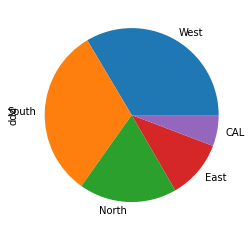

In [16]:
m_df4['ddd'].value_counts().plot(kind='pie')

In [18]:
m_df4_winter = m_df4['2020-11':'2021-02']

<AxesSubplot:ylabel='ddd'>

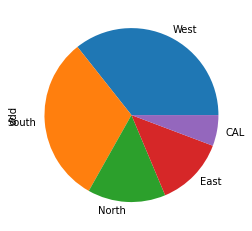

In [19]:
m_df4_winter['ddd'].value_counts().plot(kind='pie')

In [54]:
m_df4_winter.groupby('ddd')['ddd'].count()

ddd
CAL       55
East     124
North    139
South    299
West     342
Name: ddd, dtype: int64

In [237]:
# Load Airport data
dfa = pd.read_csv('UNOO.01.12.2019.04.05.2021.1.0.0.ru.utf8.00000000.csv', sep=';', skiprows=6, index_col=0)
dfa1 = pd.read_csv('28699.01.12.2019.04.05.2021.1.0.0.ru.utf8.00000000.csv',sep=';', skiprows=6, index_col=0)

dfa.index = pd.to_datetime(dfa.index)
dfa1.index = pd.to_datetime(dfa1.index)

In [242]:
# Drop NaN columns'
dfa1 = dfa1.drop(columns=['Po', 'P', 'Ff', 'ff10', 'WW', 'W1', 'Tx', 'Cl', 'Nh', 'H', 'Cm', 'VV', 'tR', 'E', 'Tg', 'E', 'sss', "E'", 'Pa', 'ff3', 'W2', 'Ch', 'Td'])

In [243]:
# reverse
dfa = dfa.iloc[::-1]
dfa1 = dfa1.iloc[::-1]

In [204]:
# df_comp = m_df[['T(C)','ddd','ffkmh','P0hPa']].copy()
# df_comp['T_ap'] = dfa1['T']

In [247]:
dfa['2020-04-10']['T']

Местное время в Омске / им. Д. М. Карбышева (аэропорт)
2020-04-10 00:00:00    11.0
2020-04-10 00:30:00    10.0
2020-04-10 01:00:00    10.0
2020-04-10 01:30:00     9.0
2020-04-10 02:00:00     9.0
2020-04-10 02:30:00     9.0
2020-04-10 03:00:00     8.0
2020-04-10 03:30:00     8.0
2020-04-10 04:00:00     7.0
2020-04-10 04:30:00     6.0
2020-04-10 05:00:00     5.0
2020-04-10 06:00:00     4.0
2020-04-10 06:30:00     4.0
2020-04-10 07:00:00     4.0
2020-04-10 07:30:00     4.0
2020-04-10 08:00:00     3.0
2020-04-10 08:30:00     3.0
2020-04-10 09:00:00     3.0
2020-04-10 09:30:00     3.0
2020-04-10 10:00:00     3.0
2020-04-10 10:30:00     2.0
2020-04-10 11:00:00     2.0
2020-04-10 11:30:00     3.0
2020-04-10 12:00:00     3.0
2020-04-10 12:30:00     3.0
2020-04-10 13:00:00     3.0
2020-04-10 13:30:00     3.0
2020-04-10 14:00:00     3.0
2020-04-10 14:30:00     3.0
2020-04-10 15:00:00     3.0
2020-04-10 15:30:00     3.0
2020-04-10 16:00:00     3.0
2020-04-10 16:30:00     3.0
2020-04-10 17:00:00  

In [11]:
# select winter period